## CO2 Emission Prediction from Vehicles using Multiple Linear Regression

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import random

### Loading Data

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Data Preprocessing

In [5]:
# Dealing with Null Values
df['ENGINESIZE'] = df['ENGINESIZE'].replace(np.NaN, df['ENGINESIZE'].mean)
df['CYLINDERS'] = df['CYLINDERS'].replace(np.NaN, df['CYLINDERS'].mean)
df['FUELCONSUMPTION_CITY'] = df['FUELCONSUMPTION_CITY'].replace(np.NaN, df['FUELCONSUMPTION_CITY'].mean)
df['FUELCONSUMPTION_HWY'] = df['FUELCONSUMPTION_HWY'].replace(np.NaN, df['FUELCONSUMPTION_HWY'].mean)
df['FUELCONSUMPTION_COMB'] = df['FUELCONSUMPTION_COMB'].replace(np.NaN, df['FUELCONSUMPTION_COMB'].mean)
df['FUELCONSUMPTION_COMB_MPG'] = df['FUELCONSUMPTION_COMB_MPG'].replace(np.NaN, df['FUELCONSUMPTION_COMB_MPG'].mean)
df['CO2EMISSIONS'] = df['CO2EMISSIONS'].replace(np.NaN, df['CO2EMISSIONS'].mean)
# In case if any Null Tuple remains exist
df = df.dropna()
df.shape

(1067, 13)

#### Dependent Attributes on Target

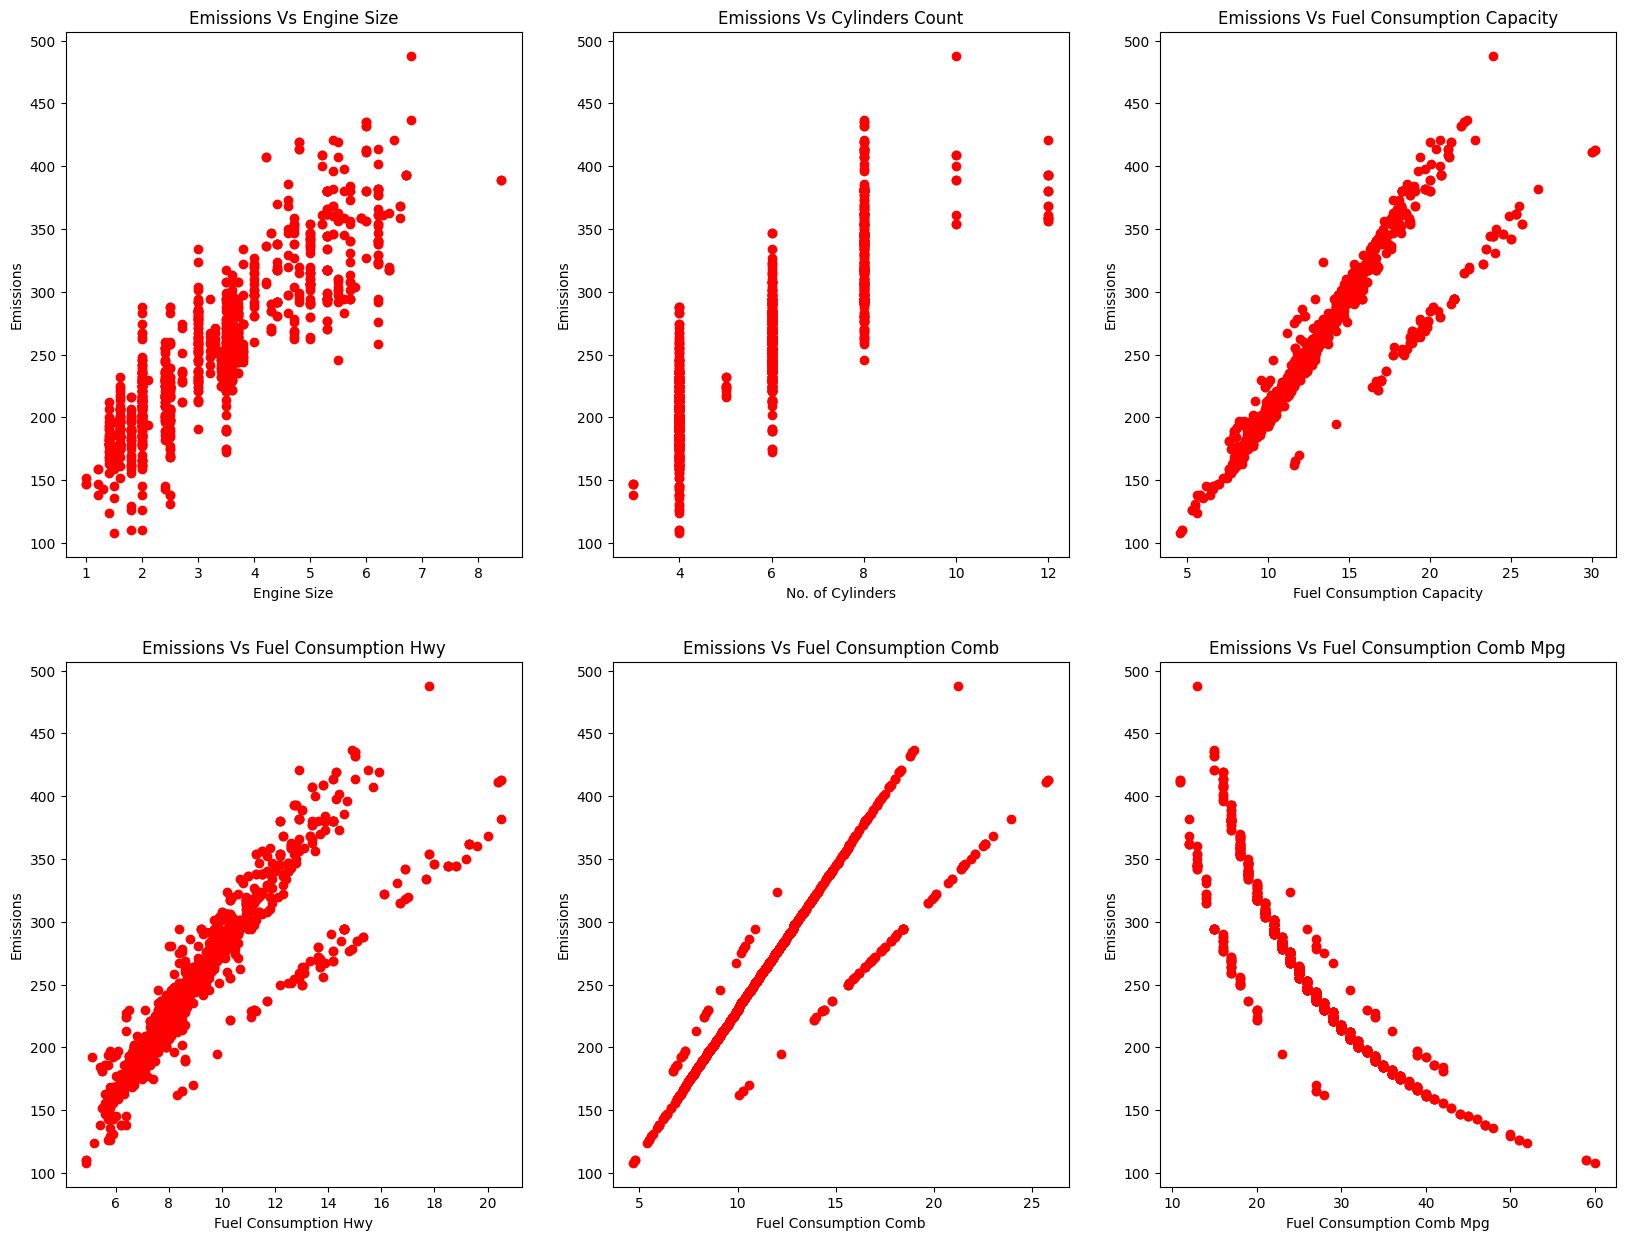

In [6]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplot(2, 3, 1)
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Engine Size')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.subplot(2, 3, 2)
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Cylinders Count')
plt.xlabel("No. of Cylinders")
plt.ylabel("Emissions")
plt.subplot(2, 3, 3)
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Capacity')
plt.xlabel("Fuel Consumption Capacity")
plt.ylabel("Emissions")
plt.subplot(2, 3, 4)
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Hwy')
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("Emissions")
plt.subplot(2, 3, 5)
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Comb')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emissions")
plt.subplot(2, 3, 6)
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Comb Mpg')
plt.xlabel("Fuel Consumption Comb Mpg")
plt.ylabel("Emissions")
plt.show()

####  Correlation Heatmap

<AxesSubplot: >

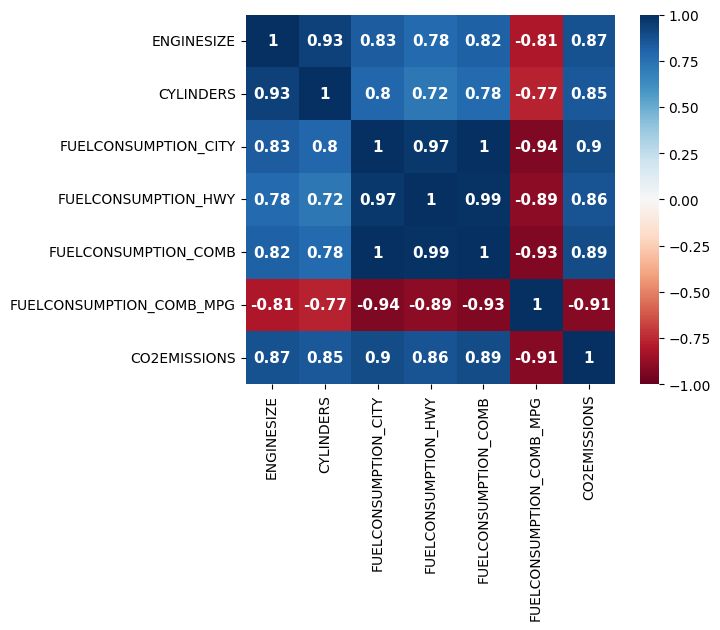

In [7]:
data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
          'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
corr = data.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'},
           square=True)

#### Correlation of all attributes with another attributes

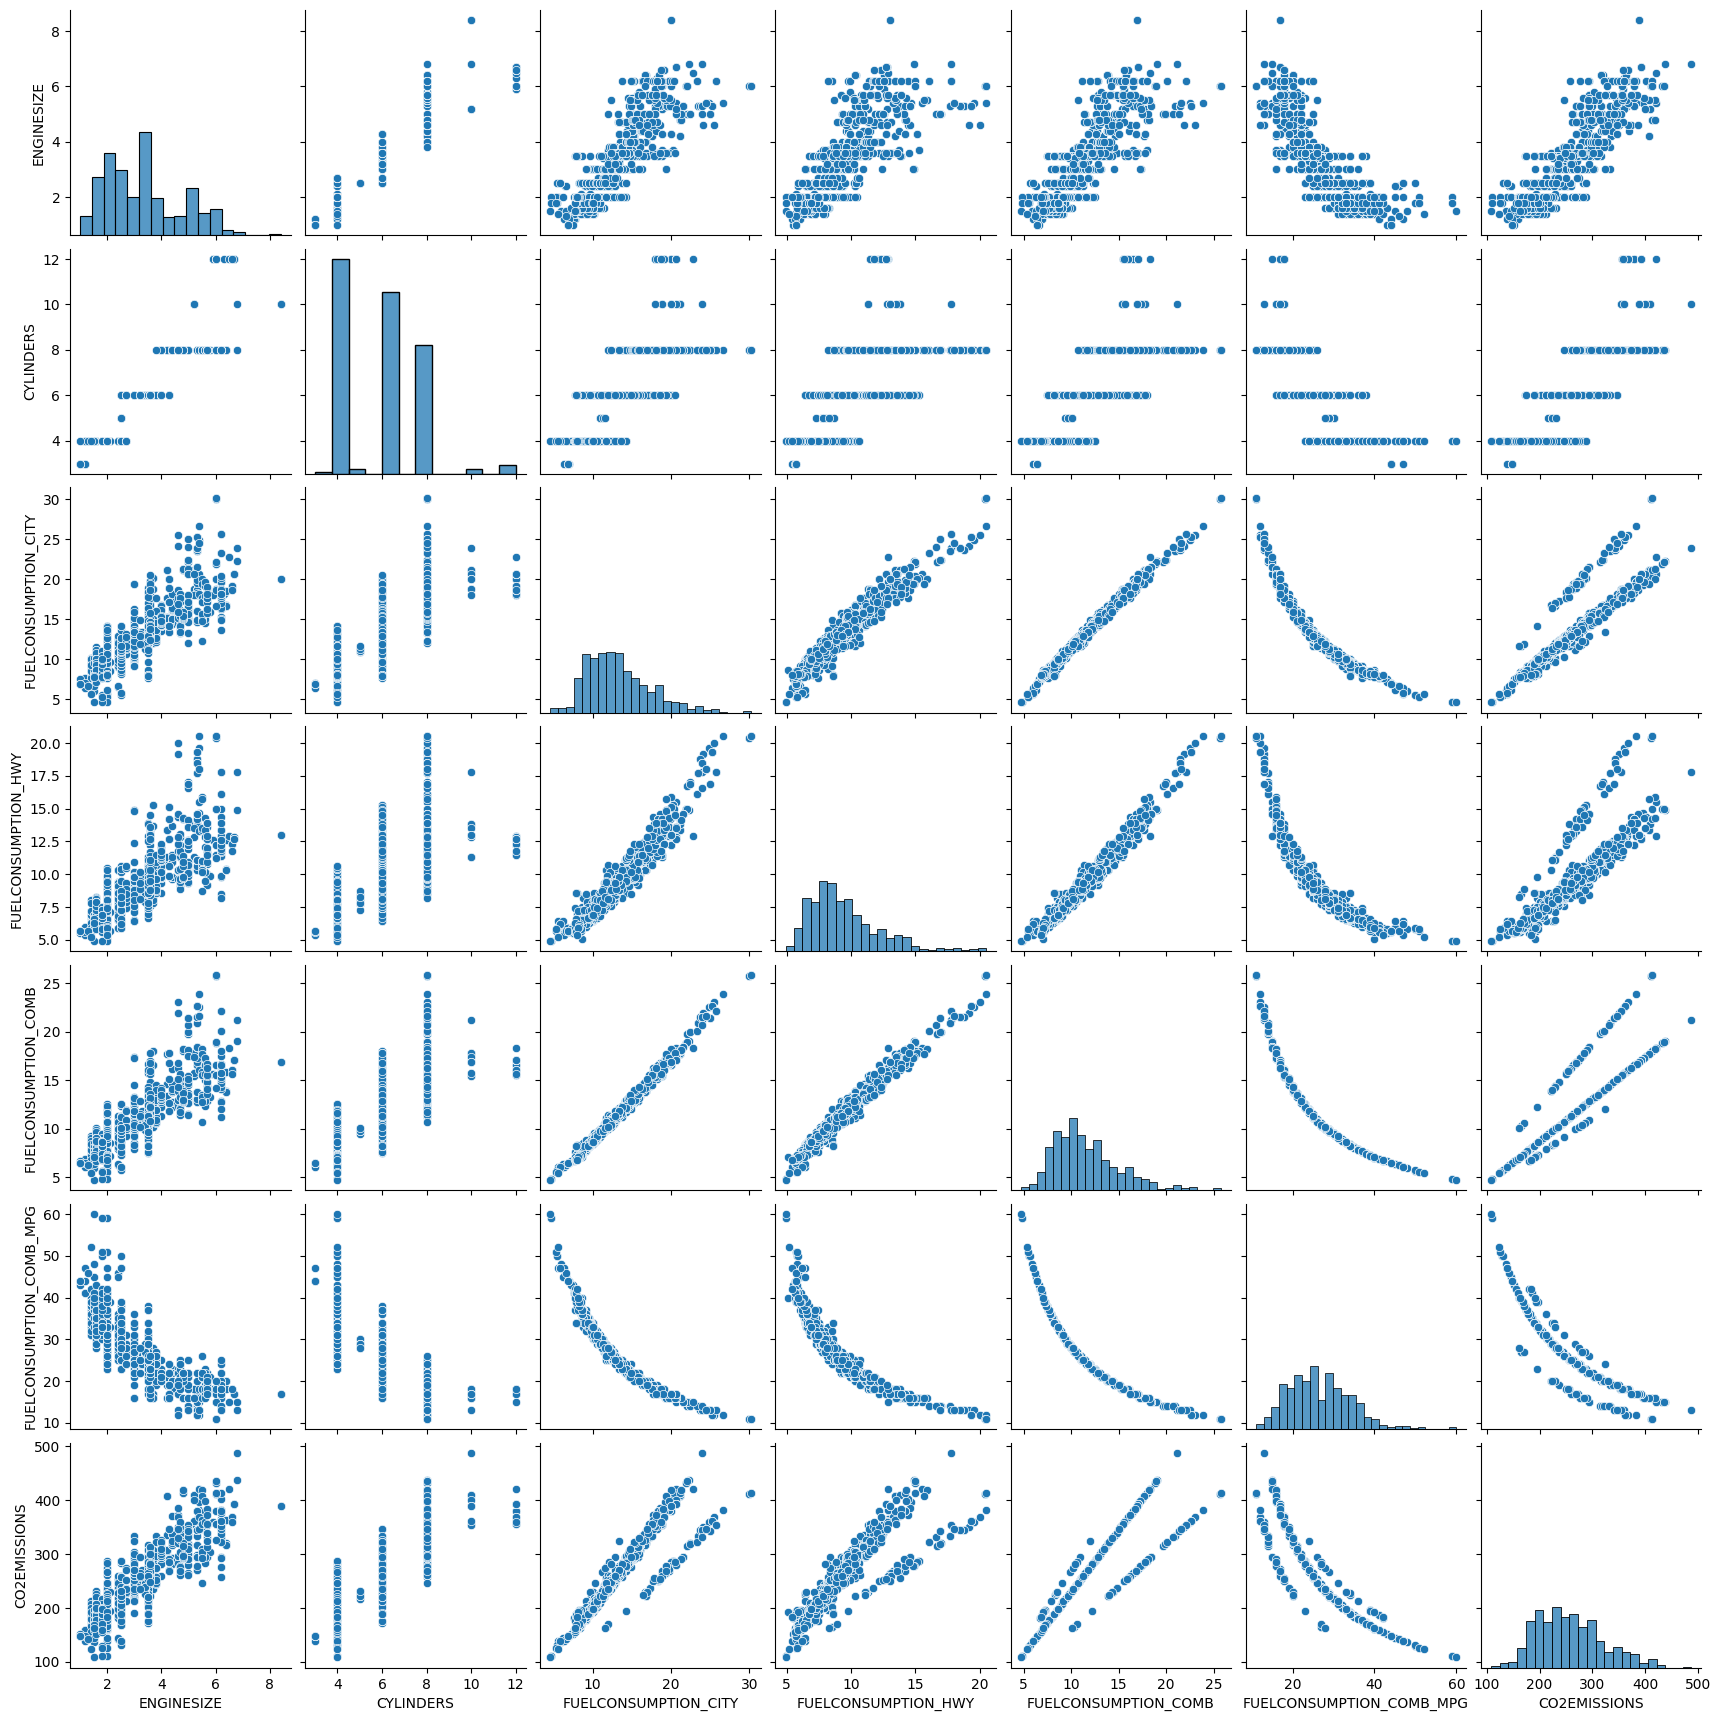

In [8]:
sns.pairplot(data, kind="scatter")
plt.show()

### Splitting Data

In [9]:
from sklearn.preprocessing import MinMaxScaler
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
          'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
# scaling data between 0 & 1
scaler = MinMaxScaler()
cdf = scaler.fit_transform(cdf)
cdf = pd.DataFrame(cdf, columns=[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                  'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']])
cdf.head()
# iloc can be used here.


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                                    'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']], cdf[['CO2EMISSIONS']], test_size=0.20, random_state=58)


In [11]:
print('Shape of Training Input Data: ', X_train.shape)
print('Shape of Training Output Data: ', Y_train.shape)
print('Shape of Testing Input Data: ', X_test.shape)
print('Shape of Testing Output Data: ', Y_test.shape)

Shape of Training Input Data:  (853, 6)
Shape of Training Output Data:  (853, 1)
Shape of Testing Input Data:  (214, 6)
Shape of Testing Output Data:  (214, 1)


### Multiple Linear Regression

#### Training 

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [13]:
model.fit (X_train, Y_train)
# The coefficients
print ('Coefficients: ', model.coef_)

Coefficients:  [[ 0.15822499  0.19370331 -0.59283727 -0.05054479  0.76012876 -0.4982327 ]]


In [14]:
# The intercepts
print('Intercept: ', model.intercept_)

Intercept:  [0.40497788]


#### Prediction

In [15]:
Y_predict = model.predict(X_test)

#### Cost / Loss

In [16]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(Y_test, Y_predict)

In [17]:
print('Cost is: ', cost)
# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % model.score(X_train, Y_train))

Cost is:  0.0033347585418239418
Explained Variance score: 0.89


In [18]:
Y_test.head()

,CO2EMISSIONS
18,0.660526
512,0.386842
497,0.181579
1038,0.260526
153,0.315789


In [19]:
X_test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
18,0.662162,1.000000,0.523438,0.493590,0.516588,0.142857
512,0.189189,0.111111,0.308594,0.288462,0.303318,0.285714
497,0.067568,0.111111,0.144531,0.128205,0.142180,0.530612
1038,0.135135,0.111111,0.218750,0.166667,0.203791,0.408163
153,0.135135,0.111111,0.269531,0.192308,0.246445,0.367347


In [20]:
Y_predict = pd.DataFrame(Y_predict, columns = ['CO2EMISSIONS'])
Y_predict.head()

,CO2EMISSIONS
0,0.689687
1,0.347117
2,0.188735
3,0.261322
4,0.282680


#### Performance Testing

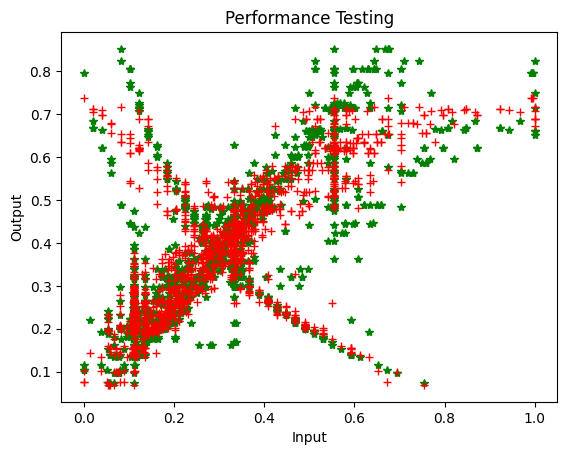

In [21]:
plt.plot(X_test, Y_test, '*', color='green')
plt.plot(X_test, Y_predict, '+', color='red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## Generating Weights for CAD VLSI Xilinx Vivado

In [22]:
train = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
             'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
test = cdf[['CO2EMISSIONS']]
weight_coef = []
weight_intercept = []
weight_cost = []
itrs = 400
for i in range(itrs):
    X_train, X_test, Y_train, Y_test = train_test_split(cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                                             'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']], cdf[['CO2EMISSIONS']], test_size=round(np.random.uniform(0.15, 0.35), 2), random_state=random.randint(50, 90))
    tmp = []
    model.fit (X_train, Y_train)
    Y_predict = model.predict(X_test)
    for j in model.coef_:
        tmp.append(j)
    weight_coef.append(tmp)
    weight_intercept.append(model.intercept_[0])
    weight_cost.append(round(mean_squared_error(Y_test, Y_predict), 4))
    


In [23]:
# printing cost weight
print(weight_cost)

[0.0032, 0.0031, 0.0034, 0.0035, 0.0021, 0.0034, 0.0035, 0.0039, 0.0031, 0.0036, 0.0034, 0.003, 0.0033, 0.0039, 0.003, 0.0036, 0.0025, 0.0038, 0.0035, 0.0032, 0.0035, 0.0031, 0.0027, 0.0029, 0.0033, 0.0034, 0.0034, 0.0033, 0.0035, 0.0028, 0.0032, 0.0037, 0.0033, 0.0029, 0.0037, 0.003, 0.0033, 0.0026, 0.0034, 0.0033, 0.0034, 0.0032, 0.0028, 0.0038, 0.0028, 0.003, 0.0029, 0.003, 0.0039, 0.0031, 0.0029, 0.0031, 0.0032, 0.0035, 0.0024, 0.0025, 0.0029, 0.003, 0.0029, 0.0029, 0.0032, 0.0034, 0.0036, 0.0036, 0.0031, 0.0034, 0.0031, 0.0031, 0.003, 0.0025, 0.0037, 0.0031, 0.0031, 0.003, 0.0039, 0.0027, 0.0021, 0.0031, 0.0025, 0.0038, 0.0036, 0.0036, 0.0038, 0.0029, 0.0029, 0.0031, 0.0032, 0.0028, 0.004, 0.0031, 0.0037, 0.0032, 0.0033, 0.0034, 0.0028, 0.0028, 0.0034, 0.0029, 0.0034, 0.0034, 0.003, 0.0033, 0.0033, 0.0037, 0.0034, 0.0029, 0.0023, 0.0034, 0.0036, 0.0034, 0.0037, 0.0039, 0.003, 0.0033, 0.0033, 0.0028, 0.0031, 0.002, 0.0034, 0.0033, 0.0029, 0.0031, 0.0035, 0.0028, 0.0028, 0.0039, 0.0

In [24]:
# printing coefficient weight
print(weight_coef)

[[array([ 0.18538128,  0.1613229 , -0.73105757, -0.25473816,  1.13124562,
       -0.48237494])], [array([ 0.14932022,  0.19823633, -0.80156692, -0.15216168,  1.10129741,
       -0.49043083])], [array([ 0.17084683,  0.17754573, -0.49842827,  0.03152535,  0.57199694,
       -0.51432163])], [array([ 0.17815839,  0.16975747, -1.45427082, -0.55089592,  2.13601666,
       -0.50482028])], [array([ 0.18451835,  0.17082077, -0.39026879,  0.02624272,  0.49853724,
       -0.48423615])], [array([ 0.14485915,  0.18608479, -1.17120301, -0.32328958,  1.65392714,
       -0.48522026])], [array([ 0.17446472,  0.17689752, -1.0770506 , -0.3081648 ,  1.49934647,
       -0.50953156])], [array([ 0.19125583,  0.16782554, -0.67966818, -0.11896126,  0.88650159,
       -0.5157882 ])], [array([ 0.17400763,  0.18662434, -1.04044854, -0.24463964,  1.40646249,
       -0.49658173])], [array([ 0.1573175 ,  0.18139526, -0.24273803,  0.11369197,  0.25839455,
       -0.50937521])], [array([ 0.1817259 ,  0.15526516, -0.76

In [25]:
# printing intercept weight
print(weight_intercept)

[0.38810221234626563, 0.39411613485641295, 0.4149949171723151, 0.39948143103493783, 0.3923553790377122, 0.39366347089169706, 0.408409237035437, 0.41484083674501826, 0.4008304204714804, 0.4088850235012385, 0.41870444519610195, 0.4135113133884992, 0.40482978308919454, 0.40771482257211406, 0.41306331600793966, 0.37632343691145553, 0.39593592822078033, 0.4157355701049538, 0.40677195609854466, 0.40566971807193253, 0.3730382669110194, 0.41339909528064017, 0.3982682466553654, 0.3683126136506001, 0.3722752684088957, 0.3727511840185492, 0.4149949171723151, 0.3917742930942993, 0.4049101921150017, 0.40738905735752257, 0.4145358159819921, 0.3962842384767485, 0.3864705764744924, 0.3874509290685419, 0.417002975114647, 0.394977487236998, 0.417265298392602, 0.41057604076999593, 0.3962761802506393, 0.394240069992557, 0.4125540416369521, 0.3930209489714182, 0.38561418179097023, 0.39090624403212076, 0.4127149872547075, 0.40973304997155535, 0.37723093347327313, 0.391423523203939, 0.4045466884019516, 0.375